# Figure 6

**Figure 6.** Average profiles of shortwave, longwave, and net 3D cloud radiative effects for the four cyclone regions. 3D cloud radiative effects are calculated as the difference in domain mean CRH between 3D (MYSTIC) and 1D (MYSTIC-ICA) radiative transfer calculations. The thin lines in panel (a) show the 3D radiative effects for nine snapshots between domain local hours 12:20 to 16:30, with the legend indicating the time and domain mean solar zenith angles for all snapshots. Note the different x-axes in panels.

---
@ Behrooz Keshtgar, KIT 2024

## 1- load python packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import colorlegend
import warnings
warnings.filterwarnings("ignore")

For reference, print package versions to screen:

In [3]:
print('xarrary:   ', xr.__version__)
print('numpy:     ', np.__version__)
import matplotlib; print('matplotlib:', matplotlib.__version__); del matplotlib

xarrary:    0.16.0
numpy:      1.23.5
matplotlib: 3.3.0


**Since datasets are large, I use DASK to speed up my analysis**

In [4]:
import dask
from dask.distributed import Client, progress, wait
dask.config.config.get('distributed').get('dashboard').update({'link':'{JUPYTERHUB_SERVICE_PREFIX}/proxy/{port}/status'})
client = Client()
client

<Client: 'tcp://127.0.0.1:43429' processes=16 threads=256, memory=522.84 GB>

## 2- Loading datasets

In [5]:
# Dictionary for loading datasets for the 4 LEM domains
domdict = {
         'shallow_cumulus'          : {'res':'300m'}, 
         'WCB_ascent'               : {'res':'300m'}, 
         'WCB_cyclonic_outflow'     : {'res':'300m'}, 
         'WCB_anticyclonic_outflow' : {'res':'300m'}
          }

In [6]:
# Loading icon-pp datasets
def load_data(solver):
    list_icon = []
    for dom in list(domdict.keys()):
        path = '/work/bb1135/b381185/icon_output/data_for_crh_unc_paper/postprocessed_data_for_publication/'
        print('Working on loading data for', dom)
        ds = xr.open_dataset(path+dom+'/libradtran_pp_'+solver+'_Fu.nc').chunk(chunks={'time': 1, 'height': 10})
        list_icon.append(ds)
    return list_icon
#-------------------------------------------------------------------------------------------------
list_libradtran_mystic=load_data('mystic')
list_libradtran_mystic_ica=load_data('mystic_ica')

Working on loading data for shallow_cumulus
Working on loading data for WCB_ascent
Working on loading data for WCB_cyclonic_outflow
Working on loading data for WCB_anticyclonic_outflow
Working on loading data for shallow_cumulus
Working on loading data for WCB_ascent
Working on loading data for WCB_cyclonic_outflow
Working on loading data for WCB_anticyclonic_outflow


## 3- Average profiles of CRH

In [7]:
# excluding boundaries and takin domain average
# MYSTIC & MYSTIC_ICA datasets
for dom in range(len(list_libradtran_mystic)):
    for var in ['lwcrh','swcrh']:
        list_libradtran_mystic[dom][var+'_smean'] = list_libradtran_mystic[dom][var].isel(lon=slice(10,list_libradtran_mystic[dom].lon.size-10),lat=slice(5,list_libradtran_mystic[dom].lat.size-5)).mean(dim=['lat','lon']).compute()
        list_libradtran_mystic_ica[dom][var+'_smean'] = list_libradtran_mystic_ica[dom][var].isel(lon=slice(10,list_libradtran_mystic_ica[dom].lon.size-10),lat=slice(5,list_libradtran_mystic_ica[dom].lat.size-5)).mean(dim=['lat','lon']).compute()

### For data publication

In [43]:
## domain mean solar zenith angles for legends:
T1 = np.array(["37.92852833275016","37.80226949178842","37.69671682401419","37.61500059570729","37.55681047321208","37.52023226519184","38.915064020556464","38.791717045432485","38.69130644707883","38.6124667555098","38.55532033675725","38.52108367831912","39.89756930574191","39.78077150359704","39.683843308414886","39.60774709076623","39.55259379419657","39.51723294416274","40.88531971355025","40.77170908179705","40.67900799236836","40.60554511010893","40.55100744451595","40.518144268424","41.871281536401376","41.761552227572196","41.6697178725893","41.59878136419815","41.54843872264263","41.51671092273384","42.86007797171621","42.75409691648596","42.66536686448403","42.59687090328268","42.54830405297876","42.51766989988411"])
T2 = np.array(["37.52804257737442","37.5708485262013","37.63525646429392","37.72313692501985","37.8348295917875","37.96714186785375","38.528617289510315","38.56887963670958","38.63201025502695","38.716806415256485","38.82312129316935","38.95233862619279","39.52450470667009","39.56568310493516","39.62660989841232","39.708454681810146","39.81108852936032","39.9335640002251","40.525161204083375","40.56362348781788","40.623754587836636","40.70276780222646","40.801001173719364","40.92008212134916","41.52348564954213","41.560619813285165","41.6163653520573","41.69266371028226","41.78984320404155","41.90485564921136","42.52421348857957","42.56006496745941","42.61384687101609","42.68752934071401","42.78142156329275","42.892511490806875"])
T3 = np.array(["38.393382140661586","38.600978593063516","38.82890610307521","39.07773477712322","39.348481903382506","39.6369378833718","39.363927225231144","39.56395129822498","39.784699610121365","40.02524626154755","40.285220442690964","40.56617571466739","40.331149307066646","40.526690604926856","40.74007105812733","40.97265672879202","41.22411566204011","41.49379378885967","41.30414264361065","41.49143810158553","41.699415052597566","41.92430775667623","42.16714492937311","42.42841883599341","42.27593517464186","42.45696514886261","42.65580677226942","42.87331074609787","43.110431242317176","43.36325730818952","43.2510471213355","43.426024665409656","43.61821460873848","43.82854736490248","44.05795260030291","44.30257970328838"])
T4 = np.array(["40.44165487593281","40.79517341482291","41.16627500474074","41.55440607164541","41.96130014675722","42.3820719537748","41.34524839499175","41.687713869889386","42.047414045180304","42.42379713129446","42.81641054514186","43.22699840313858","42.248183702305916","42.58211023033625","42.930771883486365","43.29576097771013","43.67665358752518","44.073184679411355","43.15879696979142","43.48031768182554","43.82026177828612","44.17414985378856","44.54367293360984","44.9283562661723","44.070430251562","44.38192973303821","44.70931291912708","45.052446552360756","45.41291230741974","45.786172037339895","44.98720091724115","45.288938133166084","45.60614178243116","45.93876085295428","46.2883428092579","46.65042970436143"])
T5 = np.array(["43.50211594568874","43.97527181528498","44.46282048306486","44.96331269500535","45.47915438678598","46.005096395553494","44.3150466682018","44.77547815392289","45.249264736469335","45.73632122616192","46.23620735741138","46.75087221962785","45.130128921162566","45.579619773504504","46.04039981451561","46.514289111307946","47.00087692831748","47.50032350352602","45.95476018415644","46.389379144360724","46.83961452490772","47.30054956113451","47.77451281827034","48.26020496320508","46.782802646933796","47.20510812386976","47.640895397666284","48.089170949561236","48.552118961213885","49.024824418691146","47.61788468437165","48.0281029336541","48.451546100315205","48.887329737304704","49.337583804221204","49.797473922510704"])
T6 = np.array(["47.37298481099091","47.93921762829051","48.51690408097273","49.1039174123586","49.70323218372862","50.30944323805887","48.08432474158632","48.637522367927055","49.20052156792213","49.77369095450026","50.35664786987366","50.95153566217326","48.799956197111236","49.34116735117","49.89048639142745","50.44995524366404","51.01921032206644","51.598821137349184","49.52631380121321","50.05158099135184","50.58971472382445","51.135574465877916","51.692030283912295","52.25711994962813","50.257933853848876","50.76986420180333","51.29288921767152","51.82532763166959","52.36989087901145","52.92146463286269","50.99796155460589","51.496677035303684","52.006364170309126","52.52544459678632","53.05656813151169","53.59469125116787"])
T7 = np.array(["51.86525278681334","52.50163138171818","53.14708458600082","53.79892021300535","54.460587741235656","55.12664473307323","52.4729318119723","53.09676204632896","53.72743690884621","54.365731742394566","55.01135058606687","55.66655438303498","53.086105823806854","53.697745531359175","54.314860099119265","54.939646274813256","55.57180679440118","56.21228177556476","53.710287788163946","54.30582397615151","54.911834221627075","55.523085692916375","56.14288368017729","56.76873351633969","54.34076022365604","54.92277239554441","55.51380541502224","56.111594587658","56.71929353868736","57.331720241866364","54.98022277571468","55.54872124023649","56.1261978658082","56.71049383377817","57.30468131154461","57.9036473467872"])
T8 = np.array(["56.82200151394028","57.51028685462972","58.20580702908052","58.905428907703616","59.612941706258766","60.32294837016508","57.32873029450165","58.00528311267857","58.686343393951205","59.37302749942263","60.06509818942504","60.76490058032287","57.84131104011324","58.505892757586004","59.17387410932022","59.847556632941895","60.5267054615","61.21256539012508","58.36435865451906","59.01316289095367","59.670471969779854","60.331039354919255","60.99853073445001","61.6699836082924","58.89394241575616","59.52948715602527","60.17235119183574","60.81979754299718","61.47531349684327","62.13373380049016","59.43232983181762","60.054530295128494","60.68405285944021","61.3182481911775","61.96053628082873","62.60580514800309"])
T9 = np.array(["62.12047306956876","62.84662980092738","63.57863706129193","64.312980592758","65.05370823983753","65.79550053493416","62.53087253131712","63.246180395366196","63.96416740688413","64.68622745650455","65.41218301461255","66.1444058308444","62.94682454485622","63.650520562215156","64.35602268760988","65.06567569716411","65.77930370776433","66.49839779078314","63.372092113011014","64.06053517876158","64.75588599847472","65.45296073560695","66.15567487915047","66.86068908837552","63.80349610985502","64.47912423001112","65.16072632129466","65.84514350953924","66.53613331646902","67.22858765262404","64.24289592060603","64.9055655925753","65.57421869649646","66.24579206083693","66.92396218595137","67.60368642673636"])

# Calculate mean values
T1 = np.mean(T1.astype(np.float))
T2 = np.mean(T2.astype(np.float))
T3 = np.mean(T3.astype(np.float))
T4 = np.mean(T4.astype(np.float))
T5 = np.mean(T5.astype(np.float))
T6 = np.mean(T6.astype(np.float))
T7 = np.mean(T7.astype(np.float))
T8 = np.mean(T8.astype(np.float))
T9 = np.mean(T9.astype(np.float))

# Create xarray DataArray
sza = xr.DataArray([T1, T2, T3, T4, T5, T6, T7, T8, T9],dims=list_libradtran_mystic[0]['time'].dims)
# local times of the domains 
hour = ['12:30', '13:00', '13:30', '14:00', '14:30', '15:00', '15:30', '16:00', '16:30']
# Add the 'hour' dimension to the DataArray
sza = sza.assign_coords(time=hour)

# creating a dataset and save for data publication
ds_out = xr.Dataset(
    data_vars={
        "swcrh_smean_mystic_dom01"     : (list_libradtran_mystic[0]['swcrh_smean'].dims, list_libradtran_mystic[0]['swcrh_smean'].data),
        "lwcrh_smean_mystic_dom01"     : (list_libradtran_mystic[0]['lwcrh_smean'].dims, list_libradtran_mystic[0]['lwcrh_smean'].data),
        "swcrh_smean_mystic_ica_dom01" : (list_libradtran_mystic_ica[0]['swcrh_smean'].dims, list_libradtran_mystic_ica[0]['swcrh_smean'].data),
        "lwcrh_smean_mystic_ica_dom01" : (list_libradtran_mystic_ica[0]['lwcrh_smean'].dims, list_libradtran_mystic_ica[0]['lwcrh_smean'].data),
        
        "swcrh_smean_mystic_dom02"     : (list_libradtran_mystic[1]['swcrh_smean'].dims, list_libradtran_mystic[1]['swcrh_smean'].data),
        "lwcrh_smean_mystic_dom02"     : (list_libradtran_mystic[1]['lwcrh_smean'].dims, list_libradtran_mystic[1]['lwcrh_smean'].data),
        "swcrh_smean_mystic_ica_dom02" : (list_libradtran_mystic_ica[1]['swcrh_smean'].dims, list_libradtran_mystic_ica[1]['swcrh_smean'].data),
        "lwcrh_smean_mystic_ica_dom02" : (list_libradtran_mystic_ica[1]['lwcrh_smean'].dims, list_libradtran_mystic_ica[1]['lwcrh_smean'].data),
        
        "swcrh_smean_mystic_dom03"     : (list_libradtran_mystic[2]['swcrh_smean'].dims, list_libradtran_mystic[2]['swcrh_smean'].data),
        "lwcrh_smean_mystic_dom03"     : (list_libradtran_mystic[2]['lwcrh_smean'].dims, list_libradtran_mystic[2]['lwcrh_smean'].data),
        "swcrh_smean_mystic_ica_dom03" : (list_libradtran_mystic_ica[2]['swcrh_smean'].dims, list_libradtran_mystic_ica[2]['swcrh_smean'].data),
        "lwcrh_smean_mystic_ica_dom03" : (list_libradtran_mystic_ica[2]['lwcrh_smean'].dims, list_libradtran_mystic_ica[2]['lwcrh_smean'].data),
        
        "swcrh_smean_mystic_dom04"     : (list_libradtran_mystic[3]['swcrh_smean'].dims, list_libradtran_mystic[3]['swcrh_smean'].data),
        "lwcrh_smean_mystic_dom04"     : (list_libradtran_mystic[3]['lwcrh_smean'].dims, list_libradtran_mystic[3]['lwcrh_smean'].data),
        "swcrh_smean_mystic_ica_dom04" : (list_libradtran_mystic_ica[3]['swcrh_smean'].dims, list_libradtran_mystic_ica[3]['swcrh_smean'].data),
        "lwcrh_smean_mystic_ica_dom04" : (list_libradtran_mystic_ica[3]['lwcrh_smean'].dims, list_libradtran_mystic_ica[3]['lwcrh_smean'].data),
        
    },
    coords=list_libradtran_mystic[0]['swcrh_smean'].coords)
ds_out = ds_out.assign(z_mc=list_libradtran_mystic[0]['z_mc'])
ds_out = ds_out.assign(sza=sza)

ds_out.attrs['description'] = 'Vertical profiles of CRH from MYSTIC and MYSTIC_ICA radiation calculation for each LEM domain'
ds_out.to_netcdf('/work/bb1135/b381185/icon_output/data_for_crh_unc_paper/postprocessed_data_for_publication/for_publication/figure6.nc')

In [47]:
ds_out = xr.open_dataset('/work/bb1135/b381185/icon_output/data_for_crh_unc_paper/postprocessed_data_for_publication/for_publication/figure6.nc')

## 4- Plot

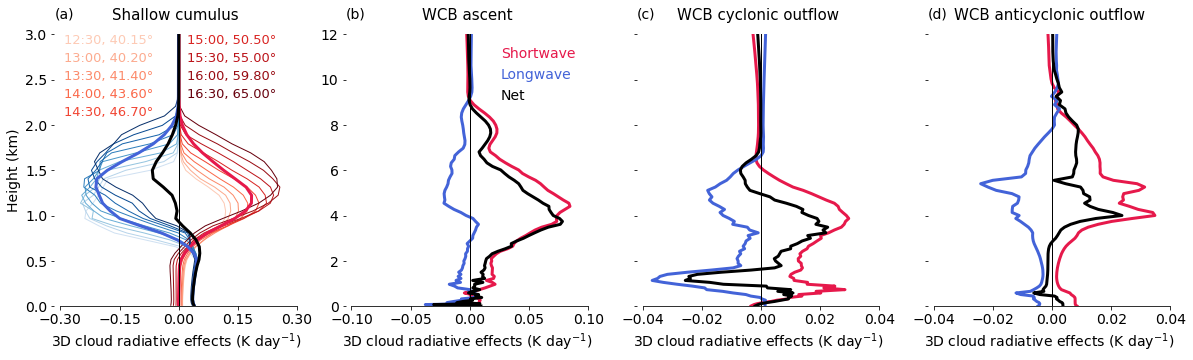

In [48]:
cmapr = cm.Reds(np.linspace(0.2,1,9))
cmapb = cm.Blues(np.linspace(0.2,1,9))

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
i = 0

z = ds_out['z_mc']

for ax in axes.flat:
    ax.tick_params(labelsize=14)
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    
    if i == 0:
        
        # at each time step
        for t in range(9):
            lw3d = ds_out['lwcrh_smean_mystic_dom01'][t].values - ds_out['lwcrh_smean_mystic_ica_dom01'][t].values
            ax.plot(lw3d,z,color=cmapb[t],lw=1,alpha=1)
            sw3d = ds_out['swcrh_smean_mystic_dom01'][t].values - ds_out['swcrh_smean_mystic_ica_dom01'][t].values
            ax.plot(sw3d,z,color=cmapr[t],lw=1,alpha=1)
        
        # time mean
        lw3d = ds_out['lwcrh_smean_mystic_dom01'].mean('time').values - ds_out['lwcrh_smean_mystic_ica_dom01'].mean('time').values
        sw3d = ds_out['swcrh_smean_mystic_dom01'].mean('time').values - ds_out['swcrh_smean_mystic_ica_dom01'].mean('time').values
        net3d = lw3d + sw3d

        ax.set_title('Shallow cumulus', fontsize=15,pad=15)
        ax.plot(sw3d,z,color='#e6194B',lw=3)
        ax.plot(lw3d,z,color='#4363d8',lw=3)
        ax.plot(net3d,z,color='#000000',lw=3)
        
        ax.axvline(x=0, ymin=0.0, ymax=1,c='black', lw=1)
        ax.set_ylabel('Height (km)', fontsize=14)
        ax.set_xlabel('3D cloud radiative effects (K day$^{-1}$)', fontsize=14)#,labelpad=10)
        ax.text(0.0, 1.06, '(a)', transform=ax.transAxes, 
            size=14)
        
        ax.set_ylim([0,3])
        
        ax.spines['bottom'].set_bounds(-0.3,0.3)
        ax.set_xticks(np.linspace(-0.3,0.3,5))
        ax.set_xlim([-0.315,0.3])
        
        ax.text(-0.29, 2.9, "12:30, 40.15°", color=cmapr[0], size=13)
        ax.text(-0.29, 2.7, "13:00, 40.20°", color=cmapr[1], size=13)
        ax.text(-0.29, 2.5, "13:30, 41.40°", color=cmapr[2], size=13)
        ax.text(-0.29, 2.3, "14:00, 43.60°", color=cmapr[3], size=13)
        ax.text(-0.29, 2.1, "14:30, 46.70°", color=cmapr[4], size=13)
        
        ax.text(0.02, 2.9, "15:00, 50.50°", color=cmapr[5], size=13)
        ax.text(0.02, 2.7, "15:30, 55.00°", color=cmapr[6], size=13)
        ax.text(0.02, 2.5, "16:00, 59.80°", color=cmapr[7], size=13)
        ax.text(0.02, 2.3, "16:30, 65.00°", color=cmapr[8], size=13)
        
    if i == 1:
        
        # time mean
        lw3d = ds_out['lwcrh_smean_mystic_dom02'].mean('time').values - ds_out['lwcrh_smean_mystic_ica_dom02'].mean('time').values
        sw3d = ds_out['swcrh_smean_mystic_dom02'].mean('time').values - ds_out['swcrh_smean_mystic_ica_dom02'].mean('time').values
        net3d = lw3d + sw3d

        ax.set_title('WCB ascent', fontsize=15,pad=15)
        ax.plot(sw3d,z,color='#e6194B',lw=3,label='Shortwave')
        ax.plot(lw3d,z,color='#4363d8',lw=3,label='Longwave')
        ax.plot(net3d,z,color='#000000',lw=3,label='Net')
        lg=colorlegend.color_legend(ax,loc=1,fsize=14)
        
        ax.axvline(x=0, ymin=0.0, ymax=1,c='black', lw=1)
        ax.set_xlabel('3D cloud radiative effects (K day$^{-1}$)', fontsize=14)
        ax.text(0.0, 1.06, '(b)', transform=ax.transAxes, 
            size=14)
        
        ax.set_ylim([0,12])
        
        ax.spines['bottom'].set_bounds(-0.1,0.1)
        ax.set_xticks(np.linspace(-0.1,0.1,5))
        ax.set_xlim([-0.105,0.1])
        
    if i == 2:
        
        # time mean
        lw3d = ds_out['lwcrh_smean_mystic_dom03'].mean('time').values - ds_out['lwcrh_smean_mystic_ica_dom03'].mean('time').values
        sw3d = ds_out['swcrh_smean_mystic_dom03'].mean('time').values - ds_out['swcrh_smean_mystic_ica_dom03'].mean('time').values
        net3d = lw3d + sw3d
        
        ax.set_title('WCB cyclonic outflow', fontsize=15,pad=15)
        ax.plot(sw3d,z,color='#e6194B',lw=3,label='Shortwave')
        ax.plot(lw3d,z,color='#4363d8',lw=3,label='Longwave')
        ax.plot(net3d,z,color='#000000',lw=3,label='Net')
        
        ax.axvline(x=0, ymin=0.0, ymax=1,c='black', lw=1)
        ax.set_xlabel('3D cloud radiative effects (K day$^{-1}$)', fontsize=14)
        ax.text(0.0, 1.06, '(c)', transform=ax.transAxes, 
            size=14)
        
        ax.set_ylim([0,12])
        ax.set_yticklabels([])
        
        ax.spines['bottom'].set_bounds(-0.04,0.04)
        ax.set_xticks(np.linspace(-0.04,0.04,5))
        ax.set_xlim([-0.042,0.04])
    
    if i == 3:
        
        # time mean
        lw3d = ds_out['lwcrh_smean_mystic_dom04'].mean('time').values - ds_out['lwcrh_smean_mystic_ica_dom04'].mean('time').values
        sw3d = ds_out['swcrh_smean_mystic_dom04'].mean('time').values - ds_out['swcrh_smean_mystic_ica_dom04'].mean('time').values
        net3d = lw3d + sw3d
        
        ax.set_title('WCB anticyclonic outflow', fontsize=15,pad=15)
        ax.plot(sw3d,z,color='#e6194B',lw=3,label='Shortwave')
        ax.plot(lw3d,z,color='#4363d8',lw=3,label='Longwave')
        ax.plot(net3d,z,color='#000000',lw=3,label='Net')
        
        ax.axvline(x=0, ymin=0.0, ymax=1,c='black', lw=1)
        ax.set_xlabel('3D cloud radiative effects (K day$^{-1}$)', fontsize=14)
        ax.text(0.0, 1.06, '(d)', transform=ax.transAxes, 
            size=14)
        
        ax.set_ylim([0,12])
        ax.set_yticklabels([])
        
        ax.spines['bottom'].set_bounds(-0.04,0.04)
        ax.set_xticks(np.linspace(-0.04,0.04,5))
        ax.set_xlim([-0.042,0.04])
        
    i = i + 1    

fig.subplots_adjust(wspace=0.2,hspace=0.35)     
plt.savefig('figure6.pdf', bbox_inches = 'tight')
#plt.savefig('figure6.png', bbox_inches = 'tight',dpi=300)    

In [45]:
client.close()